# Ejercicios de repaso de Pandas

En este notebook vamos a repasar algunos conceptos de Pandas. Este notebook está vacío, pero viene acompanhado de otro notebook con todas las soluciones.

**Es extremadamente importante evitar consultar las soluciones hasta que no hayas terminado los ejercicios en este notebook**. Las soluciones pueden parecer sencillas cuando las ves, pero sacarlas por uno mismo puede ser mucho más difícil. **Por favor, solo consulta las soluciones si no puedes avanzar después de varios intentos**.

In [1]:
pwd

'/home/dsc/Repositories/master-data-science/practice/Ex7'

In [2]:
!wc --help

Usage: wc [OPTION]... [FILE]...
  or:  wc [OPTION]... --files0-from=F
Print newline, word, and byte counts for each FILE, and a total line if
more than one FILE is specified.  A word is a non-zero-length sequence of
characters delimited by white space.

With no FILE, or when FILE is -, read standard input.

The options below may be used to select which counts are printed, always in
the following order: newline, word, character, byte, maximum line length.
  -c, --bytes            print the byte counts
  -m, --chars            print the character counts
  -l, --lines            print the newline counts
      --files0-from=F    read input from the files specified by
                           NUL-terminated names in file F;
                           If F is - then read names from standard input
  -L, --max-line-length  print the maximum display width
  -w, --words            print the word counts
      --help     display this help and exit
      --version  output version information and 

## Datos

Los datos se encuentran en el directorio `data`. Se trata de un fichero CSV, usando comas como separador, y con los nombres de las columnas en la primera fila.

*Puedes intentar usar la shell antes para comprobar cómo es el fichero*.

**Ejercicio:** Usa la shell antes de cargar el CSV para comprobar cómo de grande es. **Es posible cargar todo el fichero en memoria?**

In [3]:
!ls -sh weather_year.csv

32K weather_year.csv


In [4]:
!head -30 weather_year.csv

EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressureIn, Mean Sea Level PressureIn, Min Sea Level PressureIn, Max VisibilityMiles, Mean VisibilityMiles, Min VisibilityMiles, Max Wind SpeedMPH, Mean Wind SpeedMPH, Max Gust SpeedMPH,PrecipitationIn, CloudCover, Events, WindDirDegrees
2012-3-10,56,40,24,24,20,16,74,50,26,30.53,30.45,30.34,10,10,10,13,6,17,0.00,0,,138
2012-3-11,67,49,30,43,31,24,78,53,28,30.37,30.27,30.13,10,10,10,22,7,32,T,1,Rain,163
2012-3-12,71,62,53,59,55,43,90,76,61,30.13,29.99,29.88,10,10,6,24,14,36,0.03,6,Rain,190
2012-3-13,76,63,50,57,53,47,93,66,38,30.12,30.06,29.97,10,10,4,16,5,24,0.00,0,,242
2012-3-14,80,62,44,58,52,43,93,68,42,30.15,30.10,30.04,10,10,10,16,6,22,0.00,0,,202
2012-3-15,79,69,58,61,58,53,90,69,48,30.13,30.08,30.02,10,10,10,31,10,41,0.04,3,Rain-Thunderstorm,209
2012-3-16,75,64,52,57,54,51,100,75,49,30.14,30.10,30.07,10,10,10,14,5,20,T,2,,1

## El dataframe

**Ejercicio**: Cuántas filas tiene el dataframe? Y cuántas columnas?

*Solución*: 366 filas y 23 columnas

In [5]:
import pandas as pd
import numpy as np

In [6]:
route = 'weather_year.csv'
df_weather = pd.read_csv(route,sep=',')
df_weather.shape

(366, 23)

In [7]:
list(df_weather)

['EDT',
 'Max TemperatureF',
 'Mean TemperatureF',
 'Min TemperatureF',
 'Max Dew PointF',
 'MeanDew PointF',
 'Min DewpointF',
 'Max Humidity',
 ' Mean Humidity',
 ' Min Humidity',
 ' Max Sea Level PressureIn',
 ' Mean Sea Level PressureIn',
 ' Min Sea Level PressureIn',
 ' Max VisibilityMiles',
 ' Mean VisibilityMiles',
 ' Min VisibilityMiles',
 ' Max Wind SpeedMPH',
 ' Mean Wind SpeedMPH',
 ' Max Gust SpeedMPH',
 'PrecipitationIn',
 ' CloudCover',
 ' Events',
 ' WindDirDegrees']

## Transformar los datos

Los datos de la columna EDT parecen ser fechas, pero sin embargo no se han leído como fechas al cargar el data frame.

**Ejercicio**: Comprueba de qué tipo son los datos incluidos en la columna EDT. **Vuelve a leer el dataframe (sobre-escribiendo la variable d) para que los datos sea lean como una fecha**.

In [8]:
type(df_weather.iloc[3,0])

str

In [9]:
dates = pd.to_datetime(df_weather.iloc[:,0])
dates

0     2012-03-10
1     2012-03-11
2     2012-03-12
3     2012-03-13
4     2012-03-14
5     2012-03-15
6     2012-03-16
7     2012-03-17
8     2012-03-18
9     2012-03-19
10    2012-03-20
11    2012-03-21
12    2012-03-22
13    2012-03-23
14    2012-03-24
15    2012-03-25
16    2012-03-26
17    2012-03-27
18    2012-03-28
19    2012-03-29
20    2012-03-30
21    2012-03-31
22    2012-04-01
23    2012-04-02
24    2012-04-03
25    2012-04-04
26    2012-04-05
27    2012-04-06
28    2012-04-07
29    2012-04-08
         ...    
336   2013-02-09
337   2013-02-10
338   2013-02-11
339   2013-02-12
340   2013-02-13
341   2013-02-14
342   2013-02-15
343   2013-02-16
344   2013-02-17
345   2013-02-18
346   2013-02-19
347   2013-02-20
348   2013-02-21
349   2013-02-22
350   2013-02-23
351   2013-02-24
352   2013-02-25
353   2013-02-26
354   2013-02-27
355   2013-02-28
356   2013-03-01
357   2013-03-02
358   2013-03-03
359   2013-03-04
360   2013-03-05
361   2013-03-06
362   2013-03-07
363   2013-03-

Para comprobar que los datos se han leído correctamente como una fecha, obtén el año, mes y semana (semana dentro del año, de 1 a 52) de la fecha que está en la cuarta fila en la columna EDT

*Solución*: 2012, 3 y 11

In [10]:
dates[3].weekofyear

11

In [54]:
route = 'weather_year.csv'
df_weather = pd.read_csv(route,sep=',',parse_dates=['EDT'])

In [ ]:
print('año: %d') % ()

## Renombrar columnas

Vamos a cambiar los nombres de todas las columnas para que sea más sencillo manejarlas

In [55]:
df_weather.columns=['date',
 'max_tempf',
 'mean_tempf',
 'min_tempf',
 'max_dewpointf',
 'mean_dewpointf',
 'min_dewpointf',
 'max_humid',
 'mean_humid',
 'min_humid',
 'max_sea_lvpress_in',
 'mean_sea_lvpress_in',
 'min_sea_lvpress_in',
 'max_visib_miles',
 'mean_visib_miles',
 'min_visib_miles',
 'max_wind_speedmph',
 'mean_wind_speedmph',
 'max_gust_speedmph',
 'precipit_in',
 'cloudcover',
 'events',
 'wind_dir_degrees']


In [13]:
type(df_weather.iloc[3,0])

pandas._libs.tslib.Timestamp

## Propiedades de las columnas

Obtén la media, desviación estándar, mínimo y máximo, y los cuartiles de la columna mean_temp

Hay un método para dataframes y columnas de dataframes (series) que te permite obtener todos esos valores de una vez. **Puedes encontrar qué método es?**

*Solución*:
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000

In [14]:
meantemp = df_weather.loc[:,'mean_tempf']
mean_meantemp=meantemp.mean()
std_meantemp= meantemp.std(ddof=0)
quant_meantemp=meantemp.quantile(0.25)
min_meantemp = meantemp.min()
max_meantemp = meantemp.max()

print(mean_meantemp)
print(std_meantemp)
print(quant_meantemp)
print(min_meantemp)
print(max_meantemp)

print(meantemp.describe())

55.68306010928962
18.41130228522461
41.0
11
89
count    366.000000
mean      55.683060
std       18.436506
min       11.000000
25%       41.000000
50%       59.000000
75%       70.750000
max       89.000000
Name: mean_tempf, dtype: float64


Ahora vamos a dibujar la evolución de mean_temp.

Extrae la columna mean_temp e intenta usar el método plot sobre ella

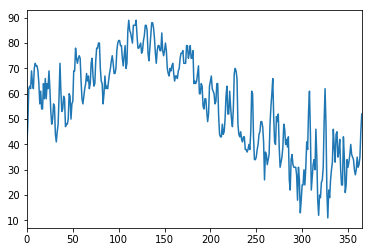

In [19]:
import matplotlib as plt
%matplotlib inline

#adecuamos la serie con la fecha como índice.


df_weather['mean_tempf'].plot()


En el eje horizontal se incluye el 'indice de la serie, que en este caso es un n'umero autocorrelativo.

Vamos a sustituir el 'indice del dataframe por la columna date, de manera que ahora la fecha sea el 'indice, y por tanto se dibuje en el eje horizontal.

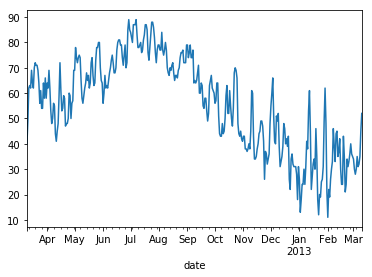

In [59]:
df2_weather.index=df_weather['date']
df2_weather['mean_tempf'].plot()

Comprueba que ahora al dibujar la columna mean_temp, en el eje horizontal vemos la fecha en vez del 'indice autocorrelativo

Sin embargo, ahora el dataframe tiene a la vez el índice y la columna date con los mismos valores. La columna date es redundante. **Podrías eliminarla?**

Ten cuidado, porque al eliminar una columna no actúas sobre el dataframe, sino que obtienes una copia del dataframe con la columna eliminada. No necesitamos el dataframe original, así que sobreescribe d con el nuevo dataframe sin la columna date.

Al usar plot, obtenemos un gráfico de la serie temporal de la columna mean_temp. Vamos ahora a dibujar un histograma de esta columna, usando hist en vez de plot. **Intenta entender cuál es la diferencia entre ambos gráficos. Por qué ya no aparece la fecha en el gráfico? Qué valores se muestran en cada uno de los ejes?**

**En qué situaciones es útil un histograma?**

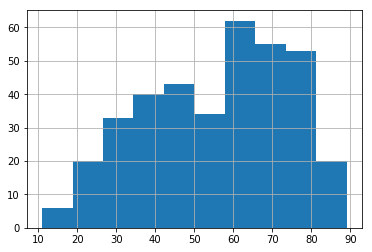

In [67]:
df2_weather['mean_tempf'].hist()

Los valores de la temperatura estan en grados Farenheit, unas unidades que son difíciles de interpretar para la mayoría de nosotros.

Vamos a crear una columna mean_tempC que contenga los valores de mean_temp, pero transformados a grados centígrados, más fáciles de interpretar para nosotros. Para ello haremos uso de la función definida en la siguiente celda:

In [146]:
df2_weather['mean_tempc']= (df2_weather['mean_tempf'] - 32)/1.8
df2_weather['mean_tempc'].head()

date
2012-03-10     4.444444
2012-03-11     9.444444
2012-03-12    16.666667
2012-03-13    17.222222
2012-03-14    16.666667
Name: mean_tempc, dtype: float64

Usa la función para crear la columna adicional con los valores en grados centígrados (grados Celsius), de nombre **mean_tempC**

In [145]:
df2_weather.head()

,max_tempf,mean_tempf,min_tempf,max_dewpointf,mean_dewpointf,min_dewpointf,max_humid,mean_humid,min_humid,max_sea_lvpress_in,...,mean_wind_speedmph,max_gust_speedmph,precipit_in,cloudcover,events,wind_dir_degrees,mean_tempc,min_tempc,max_tempc,precipitationN
date,,,,,,,,,,,,,,,,,,,,,
2012-03-10,56,40,24,24,20,16,74,50,26,30.53,...,6,17.0,0.00,0,NaN,138,4.444444,-4.444444,13.333333,0.00
2012-03-11,67,49,30,43,31,24,78,53,28,30.37,...,7,32.0,T,1,Rain,163,9.444444,-1.111111,19.444444,0.00
2012-03-12,71,62,53,59,55,43,90,76,61,30.13,...,14,36.0,0.03,6,Rain,190,16.666667,11.666667,21.666667,0.03
2012-03-13,76,63,50,57,53,47,93,66,38,30.12,...,5,24.0,0.00,0,NaN,242,17.222222,10.000000,24.444444,0.00
2012-03-14,80,62,44,58,52,43,93,68,42,30.15,...,6,22.0,0.00,0,NaN,202,16.666667,6.666667,26.666667,0.00


Dibuja ahora la serie temporal con esta nueva columna, usando plot. Incluye una rejilla (grid) en el gráfico para que sea más fácil de leer e interpretar

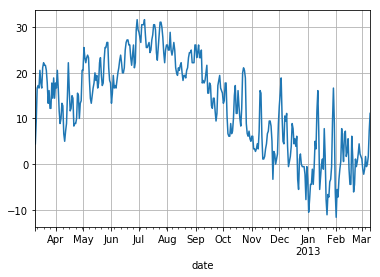

In [73]:
df2_weather['mean_tempc'].plot(grid=True)

Dibuja ahora también un histograma de esta nueva columna. **Cuál es el rango de temperaturas más frecuente en los datos?**

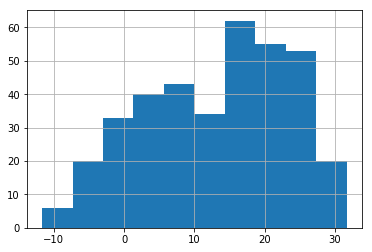

In [74]:
df2_weather['mean_tempc'].hist(grid=True)
#parece que 17ºC

Como se puede ver en ambos gráficos, hay algunos días con temperaturas bajo 0.

**En qué día ocurrió la temperatura más baja? Cuál fue la temperature media ese día?**

**Cuántos días de temperaturas bajo cero hay en los datos?**

*Solución: El 1 de febrero de 2013 con -11.67 C, 44 d'ias

In [86]:
#registro de temperaturas bajo cero.
under0= df2_weather['mean_tempc'][df2_weather['mean_tempc']<0]

#COntamos el número de hits bajo cero.
under0count=under0.value_counts().sum()

#mínima absoluta en ºC
supermin_tempc=df2_weather['mean_tempc'].min()
print(supermin_tempc)
print(under0count)



-11.6666666667
44


En el dataframe tenemos también las columnas min_temp y max_temp, que están también en grados Farenheit.

Crea dos columnas nuevas min_tempC y max_tempC, que contengan las temperaturas en grados centígrados. Recuerda que tienes la función f2c disponible.

In [144]:
def f2c(f):
    c = (f-32)/1.8
    return c

df2_weather['min_tempc']=df2_weather['min_tempf'].apply(lambda x: f2c(x))
df2_weather['max_tempc']=df2_weather['max_tempf'].apply(lambda x: f2c(x))
print(df2_weather.head())

            max_tempf  mean_tempf  min_tempf  max_dewpointf  mean_dewpointf  \
date                                                                          
2012-03-10         56          40         24             24              20   
2012-03-11         67          49         30             43              31   
2012-03-12         71          62         53             59              55   
2012-03-13         76          63         50             57              53   
2012-03-14         80          62         44             58              52   

            min_dewpointf  max_humid  mean_humid  min_humid  \
date                                                          
2012-03-10             16         74          50         26   
2012-03-11             24         78          53         28   
2012-03-12             43         90          76         61   
2012-03-13             47         93          66         38   
2012-03-14             43         93          68         42   

    

Dibuja las series temporales de min_tempC, mean_tempC y max_tempC en una misma gráfica con tres curvas de diferentes columnas y leyenda. Añade una rejilla (grid) al gr'afico.

*Pista*: Si tienes un dataframe con la fecha en el índice y solo esas tres columnas, puedes usar el método plot del dataframe para obtener justo ese gráfico. Intenta extraer solo las tres columnas del dataframe d

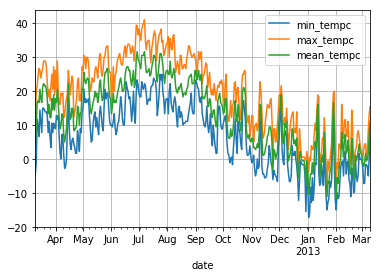

In [107]:
df2_weather.plot(y=['min_tempc','max_tempc','mean_tempc'],grid=True)


La columna precipitation contiene la cantidad de lluvias diarias. Pero tenemos un problema, no todos los datos son numéricos. Obtén los primeros diez valores de la columna precipitation y comprueba si existe algún valor no numérico. **Que valor no numérico has encontrado?**

*Solución*: Hay valores que contienen T

In [143]:
#hay valores que contienen T
df2_weather[:]['precipit_in'].head()


date
2012-03-10    0.00
2012-03-11       T
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
Name: precipit_in, dtype: object

Además, el resto de datos de la columna se han interpretado como texto. **Usa la siguiente función para crear una columna de nombre precipitationN que contendrá los valores numéricos**.

Lo que vamos a hacer es transformar en un número si encontramos un valor numérico, y en el caso de que encontremos T, el valor correspondiente será 0.00. El valor T significa que en ese día hubo trazas de lluvia. Es decir, llovió, pero muy poco, y no ha quedado registrado el volumen de precipitación.

In [142]:
def precip_num(p):
    if p == "T":
        value = 0.00
    else:
        value = float(p)
    return value

df2_weather['precipitationN'] = df2_weather['precipit_in'].apply(lambda x: precip_num(x))
print(df2_weather['precipitationN'].head())

date
2012-03-10    0.00
2012-03-11    0.00
2012-03-12    0.03
2012-03-13    0.00
2012-03-14    0.00
Name: precipitationN, dtype: float64


Desde este momento, vamos a trabajar solo con las siguientes columnas:
* min_tempC
* mean_tempC
* max_tempC
* precipitationN

El índice del dataframe lo vamos a conservar también, para tener las fechas para dibujar diversos gráficos.

**Crea un dataframe de nombre w que contenga solo esas columnas, pero que conserve el índice de d**

In [147]:
w = df2_weather[['min_tempc','mean_tempc','max_tempc','precipitationN']]
print(w.head())

            min_tempc  mean_tempc  max_tempc  precipitationN
date                                                        
2012-03-10  -4.444444    4.444444  13.333333            0.00
2012-03-11  -1.111111    9.444444  19.444444            0.00
2012-03-12  11.666667   16.666667  21.666667            0.03
2012-03-13  10.000000   17.222222  24.444444            0.00
2012-03-14   6.666667   16.666667  26.666667            0.00


A modo de ejemplo, vemos cómo realizar una nube de puntos relacionando precipitación con la temperatura media.

Existen muchos gráficos que se pueden hacer directamente con Pandas y sus Series y Dataframes. Para más información, consulta la documentación en http://pandas.pydata.org/pandas-docs/stable/visualization.html

**Llovió algún día en los que la temperatura media era menor que 0?**

*Solución*: Sí, algunos puntos con temperaturas negativas tienen precipitaciones positivas.

In [158]:
(w['precipitationN']>0 and w['mean_tempc']<0]).all()

SyntaxError: invalid syntax (<ipython-input-158-572de9a62431>, line 1)

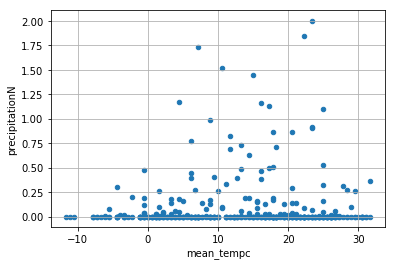

In [159]:
w.plot(kind='scatter',x='mean_tempc',y='precipitationN',grid=True)